# Module 4 - Exercise 5: PyTorch Basics

<a href="https://colab.research.google.com/github/jumpingsphinx/jumpingsphinx.github.io/blob/main/notebooks/module4-neural-networks/exercise5-pytorch-basics.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this exercise, you will be able to:

- Understand PyTorch tensors and autograd
- Build neural networks using nn.Module
- Train models with PyTorch's built-in optimizers
- Use DataLoader for efficient batch processing
- Save and load trained models
- Compare PyTorch with your NumPy implementation

## Prerequisites

- Completion of Exercise 4 (NumPy Implementation)
- Basic understanding of deep learning frameworks
- Familiarity with Python classes

## Setup

Run this cell first to import required libraries:

In [1]:
# Install PyTorch (uncomment if needed)
# !pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")
print("Setup complete!")

PyTorch version: 2.4.0
Device: cuda
Setup complete!


---

## Part 1: PyTorch Tensors

### Background

PyTorch tensors are similar to NumPy arrays but:
- Can run on GPU for acceleration
- Support automatic differentiation
- Are the foundation of PyTorch neural networks

### Exercise 1.1: Create and Manipulate Tensors

**Task:** Learn basic tensor operations.

In [2]:
print("PyTorch Tensor Basics")
print("=" * 70)

# Create tensors
x = torch.tensor([1, 2, 3, 4, 5])
print(f"1D tensor: {x}")

# 2D tensor (matrix)
X = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(f"\n2D tensor:\n{X}")

# Random tensors
rand_tensor = torch.randn(3, 4)  # Normal distribution
print(f"\nRandom tensor:\n{rand_tensor}")

# Zeros and ones
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 3)
print(f"\nZeros:\n{zeros}")
print(f"\nOnes:\n{ones}")

# Tensor properties
print("\nTensor Properties:")
print(f"Shape: {X.shape}")
print(f"Data type: {X.dtype}")
print(f"Device: {X.device}")

# Convert to/from NumPy
numpy_array = X.numpy()
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"\nNumPy array:\n{numpy_array}")
print(f"Tensor from NumPy:\n{tensor_from_numpy}")

PyTorch Tensor Basics
1D tensor: tensor([1, 2, 3, 4, 5])

2D tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])

Random tensor:
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380],
        [ 0.4617,  0.2674,  0.5349,  0.8094]])

Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Tensor Properties:
Shape: torch.Size([2, 3])
Data type: torch.int64
Device: cpu

NumPy array:
[[1 2 3]
 [4 5 6]]
Tensor from NumPy:
tensor([[1, 2, 3],
        [4, 5, 6]])


### Exercise 1.2: Tensor Operations

**Task:** Perform common tensor operations.

In [3]:
# Create tensors for operations
a = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]])
b = torch.tensor([[5.0, 6.0],
                  [7.0, 8.0]])

print("Tensor Operations")
print("=" * 70)

# Element-wise operations
print(a + b)
print(a * b)
print(f"a + b:\n{a + b}")
print(f"\na * b (element-wise):\n{a * b}")

# Matrix multiplication
print(f"\na @ b (matrix multiplication):\n{a @ b}")
# Or use torch.mm(a, b)

# Transpose
print(f"\na.T (transpose):\n{a.T}")

# Reshape
reshaped = a.reshape(1, 4)
print(f"\nReshape to (1, 4):\n{reshaped}")

# Aggregations
print(f"\nSum: {a.sum()}")
print(f"Mean: {a.mean()}")
print(f"Max: {a.max()}")
print(f"Argmax: {a.argmax()}")

Tensor Operations
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 5., 12.],
        [21., 32.]])
a + b:
tensor([[ 6.,  8.],
        [10., 12.]])

a * b (element-wise):
tensor([[ 5., 12.],
        [21., 32.]])

a @ b (matrix multiplication):
tensor([[19., 22.],
        [43., 50.]])

a.T (transpose):
tensor([[1., 3.],
        [2., 4.]])

Reshape to (1, 4):
tensor([[1., 2., 3., 4.]])

Sum: 10.0
Mean: 2.5
Max: 4.0
Argmax: 3


---

## Part 2: Automatic Differentiation (Autograd)

### Background

PyTorch's autograd system automatically computes gradients. This is the key feature that makes training neural networks easy!

### Exercise 2.1: Compute Gradients with Autograd

**Task:** Use autograd to compute derivatives.

In [4]:
# Setup for autograd
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = x * y + x**2

# Compute gradients
z.backward()

print(f"x: {x}")
print(f"y: {y}")
print(f"z: {z}")
print(f"dz/dx: {x.grad}")
print(f"dz/dy: {y.grad}")

x: 2.0
y: 3.0
z: 10.0
dz/dx: 7.0
dz/dy: 2.0


### Exercise 2.2: Gradient for a Simple Neural Network Operation

**Task:** Compute gradients for a simple linear transformation.

In [5]:
# Simulate y = W @ x + b
x = torch.randn(5, 1)  # Input
W = torch.randn(3, 5, requires_grad=True)  # Weights
b = torch.randn(3, 1, requires_grad=True)  # Bias

# Forward pass
y = W @ x + b

# Loss (sum for simplicity)
loss = y.sum()

print(f"Input shape: {x.shape}")
print(f"Weights shape: {W.shape}")
print(f"Output shape: {y.shape}")
print(f"Loss: {loss.item():.4f}")

# Backward pass
loss.backward()

print(f"\nGradients computed!")
print(f"W.grad shape: {W.grad.shape}")
print(f"b.grad shape: {b.grad.shape}")
print("\nAutograd tracked the computational graph and computed all gradients!")

Input shape: torch.Size([5, 1])
Weights shape: torch.Size([3, 5])
Output shape: torch.Size([3, 1])
Loss: 4.1425

Gradients computed!
W.grad shape: torch.Size([3, 5])
b.grad shape: torch.Size([3, 1])

Autograd tracked the computational graph and computed all gradients!


---

## Part 3: Building Neural Networks with nn.Module

### Background

`nn.Module` is the base class for all neural network modules in PyTorch. You define:
1. `__init__`: Initialize layers
2. `forward`: Define forward pass

PyTorch handles the backward pass automatically!

### Exercise 3.1: Create a Simple Network

**Task:** Build a 2-layer neural network using nn.Module.

In [6]:
class SimpleNN(nn.Module):
    """
    Simple 2-layer neural network.
    
    Architecture: [input_size, hidden_size, output_size]
    """
    
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        """
        Forward pass.
        
        Parameters:
        -----------
        x : torch.Tensor, shape (batch_size, input_size)
        
        Returns:
        --------
        out : torch.Tensor, shape (batch_size, output_size)
        """
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
        return x

# Create model
model = SimpleNN(input_size=10, hidden_size=20, output_size=5)
print("Model Architecture:")
print(model)

# Test forward pass
x_test = torch.randn(3, 10)  # Batch of 3 samples
output = model(x_test)
print(f"\nInput shape: {x_test.shape}")
print(f"Output shape: {output.shape}")

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Model Architecture:
SimpleNN(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=5, bias=True)
)

Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])

Total parameters: 325
Trainable parameters: 325


### Exercise 3.2: Using nn.Sequential

**Task:** Build the same network using nn.Sequential for faster prototyping.

In [7]:
    model_sequential = nn.Sequential(
        nn.Linear(10, 20),
        nn.ReLU(),
        nn.Linear(20, 5)
    )
print("Sequential Model:")
print(model_sequential)

# Test
output_seq = model_sequential(x_test)
print(f"\nOutput shape: {output_seq.shape}")

print("\nNote: nn.Sequential is great for simple architectures!")
print("Use nn.Module for more complex models with custom forward logic.")

Sequential Model:
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=5, bias=True)
)

Output shape: torch.Size([3, 5])

Note: nn.Sequential is great for simple architectures!
Use nn.Module for more complex models with custom forward logic.


---

## Part 4: Loss Functions and Optimizers

### Exercise 4.1: Common Loss Functions

**Task:** Learn about PyTorch loss functions.

In [8]:
print("PyTorch Loss Functions")
print("=" * 70)

# Mean Squared Error (regression)
mse_loss = nn.MSELoss()
predictions = torch.tensor([1.0, 2.0, 3.0])
targets = torch.tensor([1.5, 2.5, 2.5])
loss_mse = mse_loss(predictions, targets)
print(f"MSE Loss: {loss_mse.item():.4f}")

# Binary Cross-Entropy (binary classification)
bce_loss = nn.BCEWithLogitsLoss()  # Combines sigmoid + BCE for stability
logits = torch.tensor([0.5, -0.2, 1.0])
targets_binary = torch.tensor([1.0, 0.0, 1.0])
loss_bce = bce_loss(logits, targets_binary)
print(f"BCE Loss: {loss_bce.item():.4f}")

# Cross-Entropy (multi-class classification)
ce_loss = nn.CrossEntropyLoss()  # Combines softmax + NLL for stability
# Note: expects raw logits, not probabilities!
logits_multi = torch.randn(3, 5)  # Batch of 3, 5 classes
targets_multi = torch.tensor([1, 3, 2])  # Class indices
loss_ce = ce_loss(logits_multi, targets_multi)
print(f"Cross-Entropy Loss: {loss_ce.item():.4f}")

print("\nNote: PyTorch loss functions often combine activation + loss")
print("for numerical stability (e.g., BCEWithLogitsLoss, CrossEntropyLoss)")

PyTorch Loss Functions
MSE Loss: 0.2500
BCE Loss: 0.4618
Cross-Entropy Loss: 2.2072

Note: PyTorch loss functions often combine activation + loss
for numerical stability (e.g., BCEWithLogitsLoss, CrossEntropyLoss)


### Exercise 4.2: Optimizers

**Task:** Explore PyTorch optimizers.

In [9]:
print("PyTorch Optimizers")
print("=" * 70)

# Create a simple model
model = SimpleNN(10, 20, 5)

# Stochastic Gradient Descent (SGD)
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
print("SGD Optimizer:")
print(optimizer_sgd)

# SGD with momentum
optimizer_sgd_momentum = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print("\nSGD with Momentum:")
print(optimizer_sgd_momentum)

# Adam (adaptive learning rate)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)
print("\nAdam Optimizer:")
print(optimizer_adam)

# RMSprop
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001)
print("\nRMSprop Optimizer:")
print(optimizer_rmsprop)

print("\nMost commonly used: Adam (good default choice)")
print("SGD with momentum: Often better for final convergence")

PyTorch Optimizers
SGD Optimizer:
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

SGD with Momentum:
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

Adam Optimizer:
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

RMSprop Optimizer:
RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)

Most commonly used: Adam (good default choice)
SGD with momentum: Often better for f

---

## Part 5: Training Loop

### Background

A typical PyTorch training loop:
1. Forward pass
2. Compute loss
3. Zero gradients
4. Backward pass
5. Update weights

### Exercise 5.1: Simple Training Example (XOR)

**Task:** Train a network on XOR using PyTorch.

In [10]:
# Re-create model and data to ensure clean graph state
X_xor = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_xor = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
losses = []
for epoch in range(1000):
    # Forward pass
    outputs = model(X_xor)
    loss = criterion(outputs, y_xor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')
    losses.append(loss.item()) # Store float, not tensor
# Alias X_train/y_train to X_xor/y_xor for compatibility
X_train = X_xor
y_train = y_xor

Epoch [100/1000], Loss: 0.0020
Epoch [200/1000], Loss: 0.0008
Epoch [300/1000], Loss: 0.0004
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


---

## Part 6: MNIST Classification

### Exercise 6.1: Load MNIST Dataset

**Task:** Download and prepare the MNIST dataset.

Loading MNIST Dataset
Training samples: 60000
Test samples: 10000
Batch size: 64
Number of training batches: 938


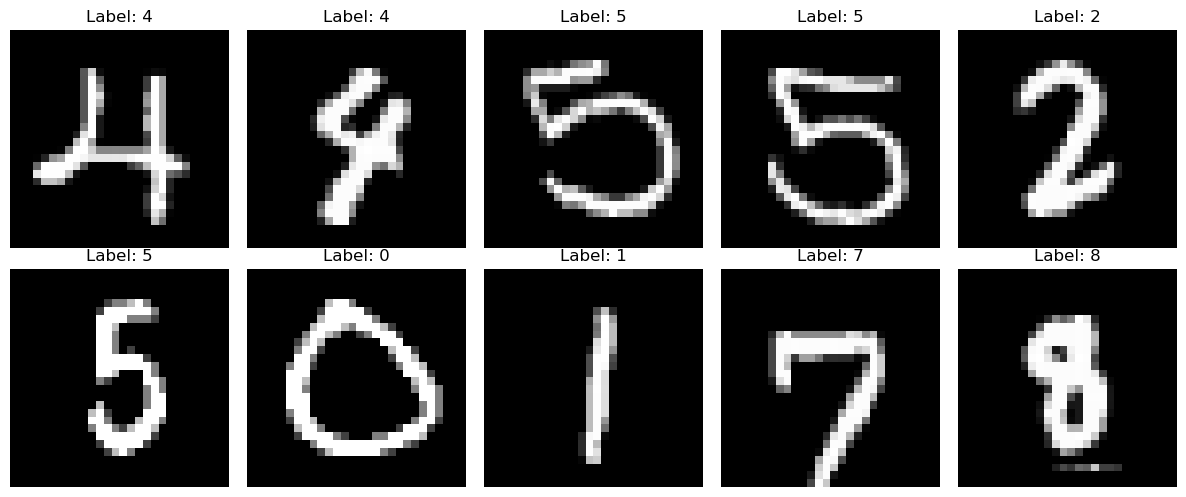


Image shape: torch.Size([1, 28, 28])
Note: Shape is (1, 28, 28) - 1 channel, 28x28 pixels


In [11]:
print("Loading MNIST Dataset")
print("=" * 70)

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize (mean, std)
])

# Download and load data
train_dataset = datasets.MNIST(root='./data', train=True, 
                              download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False,
                             download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Batch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")

# Visualize some samples
examples = iter(train_loader)
example_data, example_targets = next(examples)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(example_data[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {example_targets[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"\nImage shape: {example_data[0].shape}")
print("Note: Shape is (1, 28, 28) - 1 channel, 28x28 pixels")

### Exercise 6.2: Build MNIST Classifier

**Task:** Create a neural network for MNIST digit classification.

In [12]:
class MNISTClassifier(nn.Module):
    """
    Neural network for MNIST classification.
    Architecture: Flatten -> Dense -> ReLU -> Dense -> ReLU -> Dense
    """
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        # Input is 28x28 = 784
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10) # 10 digits

    def forward(self, x):
        # Flatten input [Batch, 1, 28, 28] -> [Batch, 784]
        x = x.view(-1, 784)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = MNISTClassifier().to(device)
print("Model initialized:")
print(model)

Model initialized:
MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


### Exercise 6.3: Train MNIST Classifier

**Task:** Implement the training loop for MNIST.

In [13]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    """
    Train for one epoch.
    """
    model.train()  # Set to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Move to device
        data, target = data.to(device), target.to(device)
        
        # Forward pass
        # Your code here
        outputs = model(data)
        loss = criterion(outputs, target)
        
        # Backward pass and optimization
        # Your code here
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100. * correct / total
    
    return avg_loss, accuracy

# Evaluation function
def evaluate(model, test_loader, criterion, device):
    """
    Evaluate on test set.
    """
    model.eval()  # Set to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disable gradient computation
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            
            outputs = model(data)
            loss = criterion(outputs, target)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    avg_loss = running_loss / len(test_loader)
    accuracy = 100. * correct / total
    
    return avg_loss, accuracy

# Train the model
print("Training MNIST Classifier")
print("=" * 70)

num_epochs = 10
train_losses, train_accs = [], []
test_losses, test_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

print("\nTraining complete!")

Training MNIST Classifier
Epoch 1/10:
  Train Loss: 0.2730, Train Acc: 91.84%
  Test Loss: 0.1332, Test Acc: 95.71%
Epoch 2/10:
  Train Loss: 0.1101, Train Acc: 96.59%
  Test Loss: 0.1060, Test Acc: 96.67%
Epoch 3/10:
  Train Loss: 0.0769, Train Acc: 97.57%
  Test Loss: 0.0878, Test Acc: 97.23%
Epoch 4/10:
  Train Loss: 0.0592, Train Acc: 98.12%
  Test Loss: 0.0845, Test Acc: 97.52%
Epoch 5/10:
  Train Loss: 0.0475, Train Acc: 98.47%
  Test Loss: 0.0884, Test Acc: 97.52%
Epoch 6/10:
  Train Loss: 0.0406, Train Acc: 98.71%
  Test Loss: 0.0906, Test Acc: 97.28%
Epoch 7/10:
  Train Loss: 0.0330, Train Acc: 98.93%
  Test Loss: 0.0991, Test Acc: 97.51%
Epoch 8/10:
  Train Loss: 0.0298, Train Acc: 99.02%
  Test Loss: 0.1107, Test Acc: 97.03%
Epoch 9/10:
  Train Loss: 0.0246, Train Acc: 99.15%
  Test Loss: 0.0858, Test Acc: 97.63%
Epoch 10/10:
  Train Loss: 0.0243, Train Acc: 99.18%
  Test Loss: 0.0899, Test Acc: 97.73%

Training complete!


### Exercise 6.4: Visualize Results

**Task:** Plot training curves and predictions.

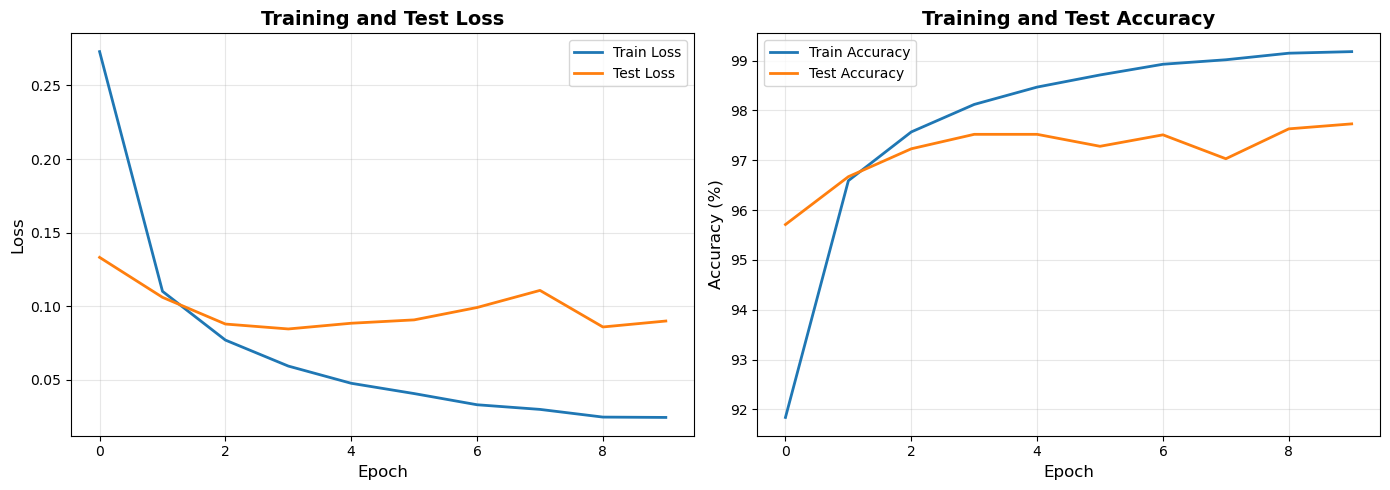

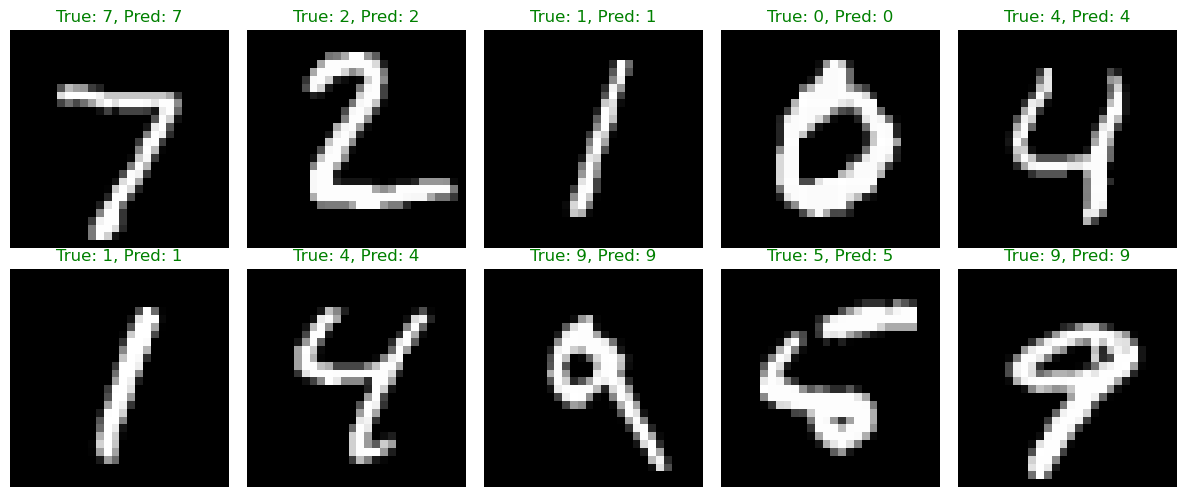

Final Test Accuracy: 97.73%


In [14]:
# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss
ax1.plot(train_losses, label='Train Loss', linewidth=2)
ax1.plot(test_losses, label='Test Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training and Test Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy
ax2.plot(train_accs, label='Train Accuracy', linewidth=2)
ax2.plot(test_accs, label='Test Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Training and Test Accuracy', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show some predictions
model.eval()
test_iter = iter(test_loader)
images, labels = next(test_iter)
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, predicted = outputs.max(1)

# Visualize
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i].squeeze(), cmap='gray')
    color = 'green' if predicted[i] == labels[i] else 'red'
    ax.set_title(f"True: {labels[i]}, Pred: {predicted[i]}", color=color)
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")

---

## Part 7: Saving and Loading Models

### Exercise 7.1: Save and Load Model

**Task:** Learn to save and load trained models.

In [15]:
print("Saving and Loading Models")
print("=" * 70)

# Save model
model_path = 'mnist_model.pth'

# Method 1: Save entire model
torch.save(model, model_path)
print(f"Model saved to {model_path}")

# Method 2: Save only state dict (recommended)
state_dict_path = 'mnist_state_dict.pth'
torch.save(model.state_dict(), state_dict_path)
print(f"State dict saved to {state_dict_path}")

# Save checkpoint with optimizer state
checkpoint_path = 'mnist_checkpoint.pth'
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': train_losses[-1],
    'test_loss': test_losses[-1],
    'test_accuracy': test_accs[-1]
}, checkpoint_path)
print(f"Checkpoint saved to {checkpoint_path}")

print("\n" + "=" * 70)

# Load model
# Method 1: Load entire model
loaded_model = torch.load(model_path)
loaded_model.eval()
print("Loaded entire model")

# Method 2: Load state dict
new_model = MNISTClassifier().to(device)
new_model.load_state_dict(torch.load(state_dict_path))
new_model.eval()
print("Loaded model from state dict")

# Load checkpoint
checkpoint = torch.load(checkpoint_path)
checkpoint_model = MNISTClassifier().to(device)
checkpoint_model.load_state_dict(checkpoint['model_state_dict'])
checkpoint_model.eval()
print(f"Loaded checkpoint from epoch {checkpoint['epoch']}")
print(f"Test accuracy: {checkpoint['test_accuracy']:.2f}%")

# Verify loaded model works
test_loss, test_acc = evaluate(new_model, test_loader, criterion, device)
print(f"\nVerification - Test Accuracy: {test_acc:.2f}%")
print("✓ Model loaded successfully!")

Saving and Loading Models
Model saved to mnist_model.pth
State dict saved to mnist_state_dict.pth
Checkpoint saved to mnist_checkpoint.pth

Loaded entire model
Loaded model from state dict
Loaded checkpoint from epoch 10
Test accuracy: 97.73%


C:\Users\ashwi\AppData\Local\Temp\ipykernel_47636\601996331.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(model_path)
C:\Users\ashwi\AppData


Verification - Test Accuracy: 97.73%
✓ Model loaded successfully!


---

## Challenge Problems (Optional)

### Challenge 1: Add Dropout Regularization

Modify the MNIST classifier to include dropout layers.

In [16]:
# Your code here: Add dropout to the network
# Hint: Use nn.Dropout(p=0.5)

print("Challenge: Add dropout regularization!")

Challenge: Add dropout regularization!


### Challenge 2: Learning Rate Scheduling

Implement learning rate decay during training.

In [17]:
# Your code here: Use torch.optim.lr_scheduler
# Try StepLR or ReduceLROnPlateau

print("Challenge: Implement learning rate scheduling!")

Challenge: Implement learning rate scheduling!


### Challenge 3: Early Stopping

Implement early stopping to prevent overfitting.

In [18]:
# Your code here: Stop training when validation loss stops improving

print("Challenge: Implement early stopping!")

Challenge: Implement early stopping!


---

## Reflection Questions

1. **How does PyTorch autograd simplify neural network training?**
   - Compare to manual backpropagation

2. **What are the advantages of nn.Module over manual implementation?**
   - Think about code organization and reusability

3. **Why use DataLoader instead of feeding entire dataset?**
   - Consider memory and training efficiency

4. **What's the difference between model.train() and model.eval()?**
   - How does this affect layers like dropout and batch norm?

5. **When should you save the entire model vs just state_dict?**
   - What are the trade-offs?

---

## Summary

In this exercise, you learned:

- PyTorch tensor operations and automatic differentiation
- Building neural networks with nn.Module and nn.Sequential
- Using loss functions and optimizers
- Implementing training loops with proper gradient handling
- Training on MNIST digit classification
- Model evaluation and visualization
- Saving and loading trained models

**Key Takeaways:**

- PyTorch autograd eliminates manual gradient computation
- nn.Module provides a clean interface for model building
- DataLoader handles batching and shuffling efficiently
- Always use `optimizer.zero_grad()` before backward pass
- Switch between train/eval modes appropriately
- Save checkpoints during training for recovery

**Next Steps:**

- Complete Exercise 6 on Advanced PyTorch
- Review [Lesson 5: Introduction to PyTorch](https://jumpingsphinx.github.io/module4-neural-networks/05-pytorch-intro/)
- Experiment with different architectures and hyperparameters

---

**Need help?** Check the solution notebook or open an issue on [GitHub](https://github.com/jumpingsphinx/jumpingsphinx.github.io/issues).